In [5]:
import torch
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

In [6]:
latent = np.loadtxt("latent.txt")
latent

array([[ 5.53493013e+00,  4.02916492e+00, -3.74626822e-01, ...,
        -4.80111098e+00, -6.21399662e+00,  6.83360054e+00],
       [ 5.33366083e+00,  3.51840784e+00, -1.06190590e+00, ...,
        -4.32943572e+00, -5.51734025e+00,  6.72590660e+00],
       [ 1.34347545e-02, -1.17843010e+00,  3.73617556e-01, ...,
        -1.09054002e-04, -3.38990909e-01, -1.16296835e+00],
       ...,
       [ 5.99646448e+00,  3.79121814e+00, -1.00524168e+00, ...,
        -5.02707632e+00, -6.27144765e+00,  6.89126488e+00],
       [ 7.95936629e+00,  4.85862996e+00, -1.43427933e+00, ...,
        -4.55850665e+00, -1.16014844e+01,  8.99211823e+00],
       [-5.41035819e-01, -1.06328242e+00,  5.35757577e-01, ...,
         1.26769984e+00,  2.47789209e-01,  1.78677526e+00]])

In [7]:
labels = np.zeros((1, latent.shape[0]), dtype=np.int32)
labels

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32)

/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


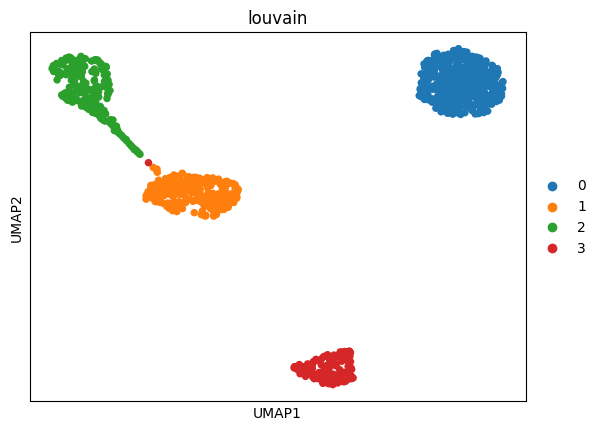

/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


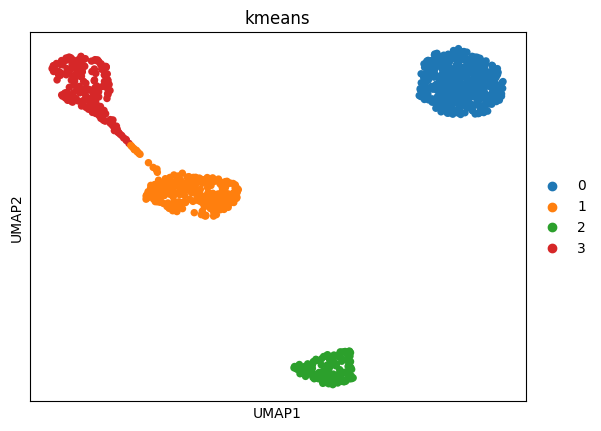

In [8]:
%matplotlib inline
# visulization
prior_adata = anndata.AnnData(X=latent)
prior_adata.obsm["X_multi_vi"] = latent
prior_adata.obs['cell_type'] = torch.tensor(labels.reshape(-1,1))
sc.pp.neighbors(prior_adata, use_rep="X_multi_vi", n_neighbors=30)
sc.tl.umap(prior_adata, min_dist=0.3)

# cluster by louvain
sc.tl.louvain(prior_adata, resolution=1)   
sc.pl.umap(prior_adata, color=['louvain'])
plt.show()

# cluster by kmeans
from sklearn.cluster import KMeans
latent_code = prior_adata.obsm["X_umap"]

kmeans = KMeans(n_clusters=4, random_state=0).fit(latent_code) 
prior_adata.obs['kmeans'] = kmeans.labels_.astype(str)
sc.pl.umap(prior_adata, color=['kmeans'])